# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     820.5
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           6.28e-40
Time:                        09:49:32   Log-Likelihood:                -2.3961
No. Observations:                  50   AIC:                             12.79
Df Residuals:                      46   BIC:                             20.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9198      0.090     54.539      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.36666812  4.9011845   5.38957231  5.79944206  6.11009348  6.31591648
  6.42731287  6.46898741  6.47588881  6.48746785  6.54119566  6.66640735
  6.87948233  7.1811532   7.55638542  7.97684743  8.40556542  8.80299805
  9.13353297  9.37133785  9.50460451  9.53748902  9.48942884  9.39194932
  9.28348415  9.20306084  9.18388859  9.24790213  9.40215789  9.63767464
  9.93090913 10.24762412 10.54851348 10.79566012 10.95876558 11.02012804
 10.97755068 10.84470257 10.64887293 10.42648753 10.2171241  10.05700979
  9.97306915  9.9785005  10.07060751 10.23124217 10.42978646 10.62818282
 10.7871869  10.87281528]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.84499253 10.66106107 10.34432758  9.94790499  9.54170859  9.19533837
  8.96103846  8.86090598  8.88148089  8.97704146]


## Plot comparison

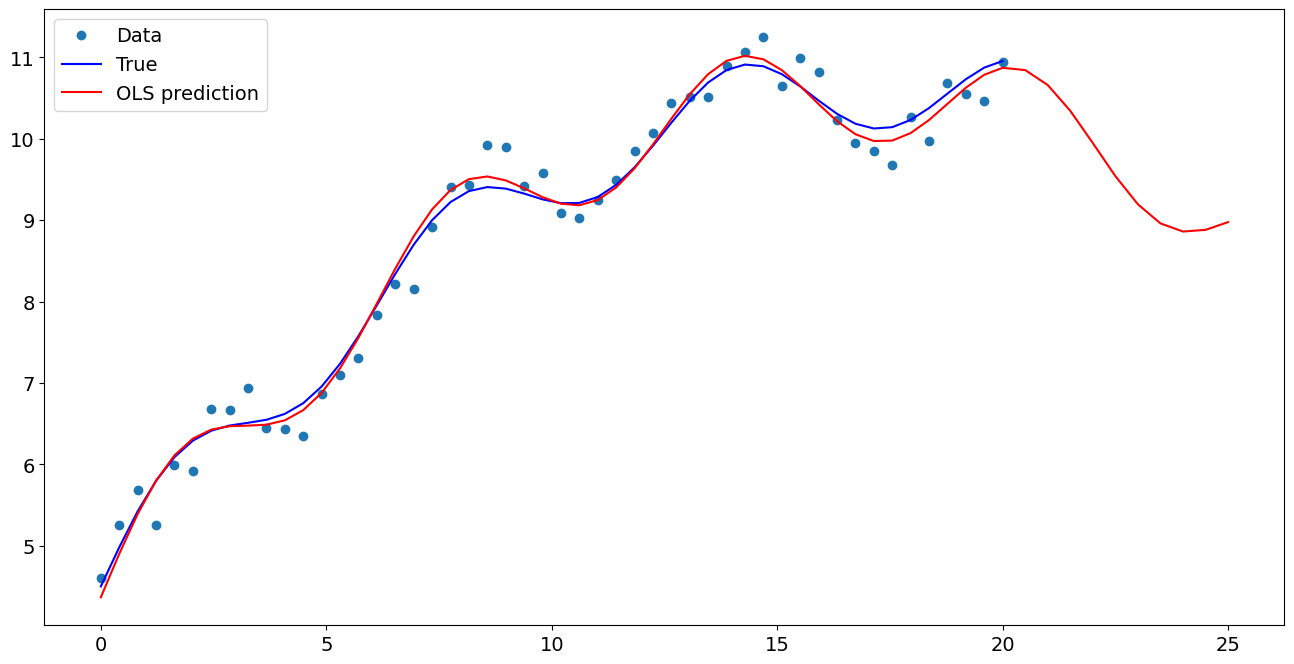

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.919755
x1                  0.519413
np.sin(x1)          0.594312
I((x1 - 5) ** 2)   -0.022123
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.844993
1    10.661061
2    10.344328
3     9.947905
4     9.541709
5     9.195338
6     8.961038
7     8.860906
8     8.881481
9     8.977041
dtype: float64